In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

**DATA PREPROCESSING:**

In [2]:
loaded_data=pd.read_csv("data.csv")
print(loaded_data.describe())
loaded_data=loaded_data.to_numpy()

              cov1         cov2         cov3         cov4         cov5  \
count  1199.000000  1199.000000  1199.000000  1199.000000  1199.000000   
mean      0.956896     0.855770     0.214263     0.147359     0.036329   
std       0.135031     0.244927     0.408193     0.388080     0.177615   
min      -0.312219    -0.531958    -0.818128    -0.839158    -0.719622   
25%       0.982505     0.840675    -0.095193    -0.143054     0.000000   
50%       0.999235     0.969806     0.175910     0.097584     0.000000   
75%       0.999993     0.996604     0.563061     0.457633     0.000000   
max       1.000000     1.000000     1.000000     0.979015     0.999196   

              cov6         cov7   sal_pur_rat  igst_itc_tot_itc_rat  \
count  1199.000000  1199.000000  1.199000e+03          1.199000e+03   
mean      0.599809     0.527768 -1.251042e-11         -5.004165e-12   
std       0.334306     0.385322  1.000000e+00          1.000000e+00   
min      -0.682734    -0.859529 -3.531330e-02    

**DECOMPOSITION**

In [3]:
#calculates gaussian similaruty matrix
def gaussian_similarity_matrix(X, sigma):
    distance_matrix = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            distance_matrix[i,j] = np.linalg.norm(X[i] - X[j])
    similarity_matrix = np.exp(-distance_matrix**2 / (2*sigma**2))
    return similarity_matrix

In [4]:
#calculates laplacian matrix
def laplacian_matrix(W):
    D = np.diag(np.sum(W, axis=1))
    L = D - W
    return L

In [5]:

def calculate_eigen_val_and_vec(L):
    #calculates eigen values and eigen vectors of given laplacian matrix
    eigvals, eigvecs = np.linalg.eig(L)
    #sort eigenvalues in ascending order
    sorted_indices = np.argsort(eigvals)
    sorted_eigenval=eigvals[sorted_indices]
    #sort eigen vectors according to sorted eigen values
    sorted_eigenvec = eigvecs[:,sorted_indices]
    return sorted_eigenval,sorted_eigenvec,sorted_indices

In [6]:
sigma=1
#obtain gaussian similarity matrix
similarity_matrix=gaussian_similarity_matrix(loaded_data, sigma)
#obtain laplacian matrix
laplacian=laplacian_matrix(similarity_matrix)
#calculate eigen values and eigen vectors
eigen_values,eigen_vectors,sorted_indices=calculate_eigen_val_and_vec(laplacian)
#round up eigen values and eigen vectors
#print(sorted_indices[360],sorted_indices[1086])

eigen_values = np.round(eigen_values, 6)
eigen_vectors = np.round(eigen_vectors, 6)
#print(eigen_vectors)
for i in range(6):
    print(eigen_values[i])

-0.0
-0.0
0.0
0.00681
0.043338
0.067835


**METHODS TO FIND OPTIMAL NUMBER OF CLUSTERS**

In [7]:
def clusters_elbow_method(eigen_vectors):
    squared_distance_sum = []
    K = range(2,11)
    for clusters in K :
       # fit KMeans model to the data
       kmeans = KMeans(n_clusters=clusters)
       evec=eigen_vectors[:, 1:clusters]
       kmeans.fit(evec)
       # calculate the sum of squared distance for the current clustering
       squared_distance_sum.append(kmeans.inertia_)
       print('#clusters=',clusters,' sum of squared distance=',squared_distance_sum[-1])
    plt.plot(K,squared_distance_sum)
    plt.xlabel('Values of K') 
    plt.ylabel('Sum of squared distances') 
    plt.title('Elbow Method For Optimal K')
    plt.show()
        

C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#clusters= 2  sum of squared distance= 5.0837544585492126e-33
#clusters= 3  sum of squared distance= 4.558896230907061e-33
#clusters= 4  sum of squared distance= 0.0008360763286446491
#clusters= 5  sum of squared distance= 4.188200234309614e-07


C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

#clusters= 6  sum of squared distance= 8.796337437185944e-08
#clusters= 7  sum of squared distance= 0.0004015952753948029
#clusters= 8  sum of squared distance= 0.045160521925665664
#clusters= 9  sum of squared distance= 0.13493637268502198


C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

#clusters= 10  sum of squared distance= 0.12400262195326833


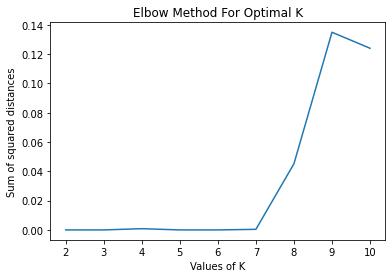

In [8]:
clusters_elbow_method(eigen_vectors)

We observe that when number of clusters=3, the sum of squared distances is less. This implies that optimal number of clusters is 3 according to elbow method

In [9]:
from sklearn.metrics import silhouette_score

def clusters_Silhouette_method(eigen_vectors):
   K = range(2, 11)
   silhouette_scores = []
   for clusters in K:
    # fit KMeans model to the data
    kmeans = KMeans(n_clusters=clusters)
    evec=eigen_vectors[:, 1:clusters]
    kmeans.fit(evec)
    cluster_labels = kmeans.labels_
    # calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(evec, cluster_labels)
    # append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)
    print('#clusters=',clusters,' Silhouette score=',silhouette_scores[-1])
    

   # plot the silhouette scores against the number of clusters
   plt.plot(K, silhouette_scores)
   plt.xlabel('Number of clusters')
   plt.ylabel('Silhouette score')
   plt.title('Silhouette Method For Optimal K')
   plt.show()

C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#clusters= 2  Silhouette score= 0.9991659716430359
#clusters= 3  Silhouette score= 0.9983319432860718
#clusters= 4  Silhouette score= 0.9973989934143735


C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#clusters= 5  Silhouette score= 0.9966123182972415
#clusters= 6  Silhouette score= 0.9957964322666064
#clusters= 7  Silhouette score= 0.9752738063681311


C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#clusters= 8  Silhouette score= 0.7713267443029114
#clusters= 9  Silhouette score= 0.7109886578369746
#clusters= 10  Silhouette score= 0.7067924745613722


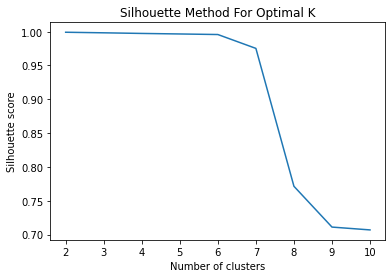

In [10]:
clusters_Silhouette_method(eigen_vectors)

We observe that when number of clusters=3, the Silhouette score is more. This implies that optimal number of clusters can be 3 according to Silhouette method.

**CLUSTERING**

In [11]:
def clustering(eigen_vectors,clusters):
        #kmeans clustering
        evec=eigen_vectors[:, 1:clusters]
        kmeans = KMeans(n_clusters=clusters).fit(evec)
        #labels
        colours=kmeans.labels_
        cluster_classes =  [ 0 for eigen_vectors in range(clusters)]
        #count number of points in each cluster
        for i in range(len(colours)):
             cluster_classes[colours[i]] +=1
        #print cluster number and number of points in it
        for i in range(clusters):
            print(f"Cluster {i}: {cluster_classes[i]}")
        
        col=['blue','green','red','cyan','magenta','orange','brown','olive','gray','steelblue','black','orchid','indigo','chocolate']

        for i in range(clusters):
             st='cluster'+ str(i)
             plt.scatter(evec[colours == i, 0], evec[colours == i, 1], s = 100, c = col[i], label = 'Cluster'+str(i))   
        #plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, c = 'yellow', label = 'Centroid')   
        plt.title('Clusters')  
        plt.legend() 
        plt.show()  
        return colours

C:\Users\manas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 1197
Cluster 1: 1
Cluster 2: 1


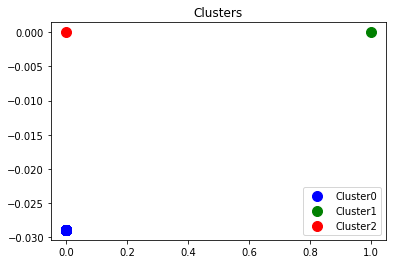

In [12]:
cluster_labels=clustering(eigen_vectors,3)


**Outliers**\
We observe that cluster 0 has 1197 points whereas cluster1 and cluster 2 have one point each. Hence, we can consider cluster 2 and cluster 3 as outliers.

In [13]:
cluster1=[i for i in range(len(eigen_values)) if cluster_labels[i]==1 ]
cluster2=[i for i in range(len(eigen_values)) if cluster_labels[i]==2 ]
print('Rows corresponding to outliers in sorted data(sorted according to eigen values):')
print('Rows corresponding to outliers of cluster 1 : ',cluster1)
print('Rows corresponding to outliers of cluster 2 : ',cluster2)
print()

cluster1=[i for i in range(len(eigen_values)) for j in range(len(cluster1)) if sorted_indices[i]==cluster1[j]]
cluster2=[i for i in range(len(eigen_values)) for j in range(len(cluster2)) if sorted_indices[i]==cluster1[j]]

print('Rows corresponding to outliers in original data:')
print('Rows corresponding to outliers of cluster 1 : ',cluster1)
print('Rows corresponding to outliers of cluster 2 : ',cluster2)
print()

print('Datacorresponding to outliers in original data:')
print('Data corresponding to outliers of cluster 1 : ',loaded_data[cluster1])
print('Data corresponding to outliers of cluster 2 : ',loaded_data[cluster2])



Rows corresponding to outliers in sorted data(sorted according to eigen values):
Rows corresponding to outliers of cluster 1 :  [591]
Rows corresponding to outliers of cluster 2 :  [202]

Rows corresponding to outliers in original data:
Rows corresponding to outliers of cluster 1 :  [360]
Rows corresponding to outliers of cluster 2 :  [1086]

Datacorresponding to outliers in original data:
Data corresponding to outliers of cluster 1 :  [[ 0.99592505  0.99735545 -0.42788943 -0.43771254  0.          0.82972292
  -0.24801104 -0.03261568 -1.06543615  0.39544647]]
Data corresponding to outliers of cluster 2 :  [[ 1.          0.98925865  0.40673191  0.41437495  0.          0.39828522
   0.99991626 -0.03313532  2.16902174 -0.05438652]]
